In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, BatchNormalization, Dropout


In [2]:
train_dataset = keras.utils.image_dataset_from_directory(
     directory = 'C:\PC-Contents\Work-Research\cats-dogs\\test',
     labels = 'inferred',
     label_mode = 'int',
     batch_size = 35,
     image_size = (256,256),

)


validation_dataset = keras.utils.image_dataset_from_directory(
     directory = 'C:\PC-Contents\Work-Research\cats-dogs\\train',
     labels = 'inferred',
     label_mode = 'int',
     batch_size = 35,
     image_size = (256,256),

)

Found 5000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [3]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image, label

train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)

In [15]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

c:\Users\swapn\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(train_dataset, epochs=12, validation_data=validation_dataset)

Epoch 1/12
143/143 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.5462 - loss: 5.2559 - val_accuracy: 0.5404 - val_loss: 1.9174
Epoch 2/12
143/143 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - accuracy: 0.5591 - loss: 1.6619 - val_accuracy: 0.5465 - val_loss: 0.9781
Epoch 3/12
143/143 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.5762 - loss: 0.8157 - val_accuracy: 0.5845 - val_loss: 0.7104
Epoch 4/12
143/143 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.5944 - loss: 0.6982 - val_accuracy: 0.6258 - val_loss: 0.6864
Epoch 5/12
143/143 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - accuracy: 0.6136 - loss: 0.6577 - val_accuracy: 0.6417 - val_loss: 0.6817
Epoch 6/12
143/143 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.6357 - loss: 0.6708 - val_accuracy: 0.6546 - val_loss: 0.6069
Epoch 7/12
143/143 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.6956 - loss: 0.5746 - val_accuracy: 0.6539 - val_loss: 0.6742
Epoch 8/12
143/143 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.6941 - loss: 0.5797 - val_accu

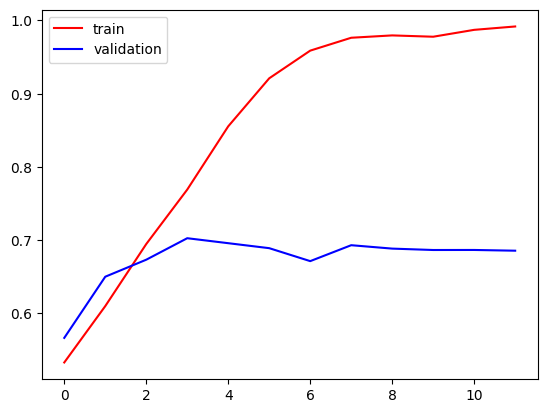

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

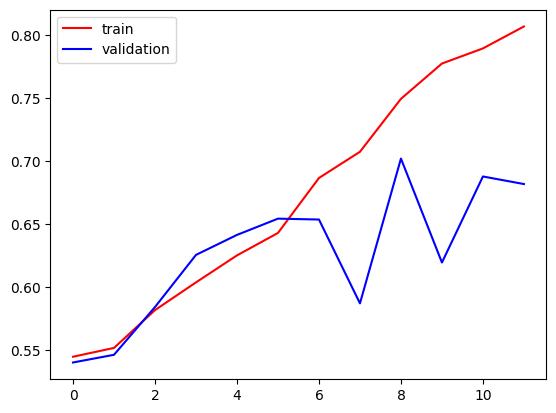

In [19]:
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

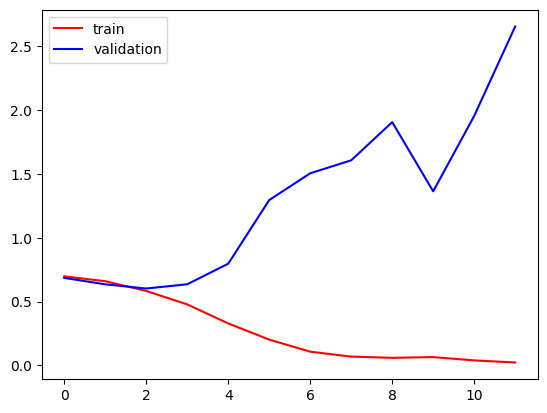

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

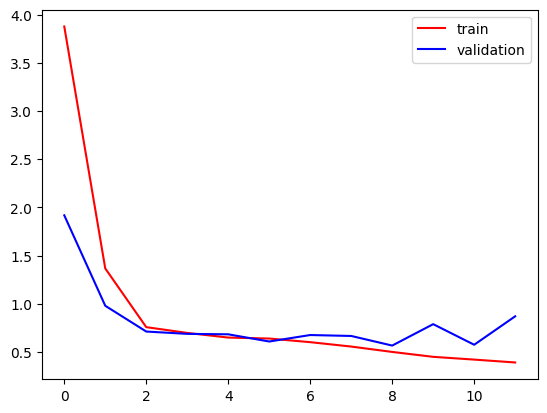

In [20]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

In [21]:
import cv2

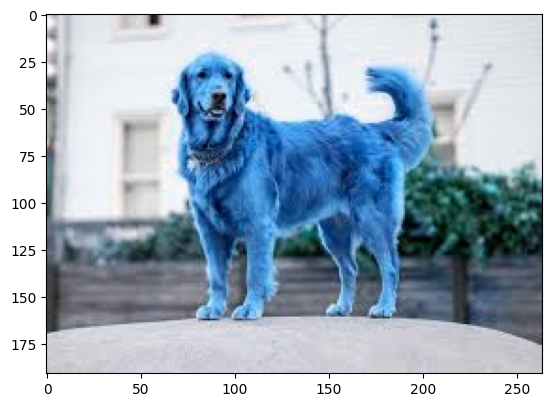

In [22]:
test_img = cv2.imread('C:\PC-Contents\Work-Research\cats-dogs\dog.jpg')
plt.imshow(test_img)

In [24]:
test_img.shape

(191, 264, 3)

In [25]:
test_img  = cv2.resize(test_img, (256,256))

In [26]:
test_input = test_img.reshape((1,256,256,3))

In [27]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


array([[1.]], dtype=float32)

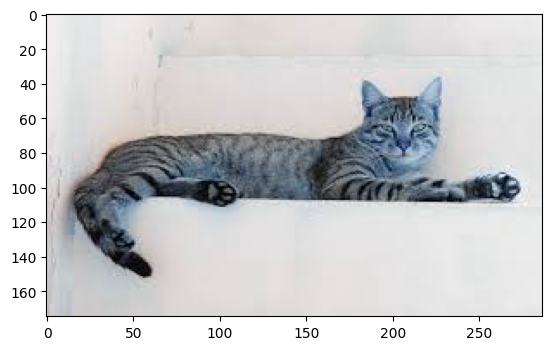

In [28]:
test_img = cv2.imread('C:\PC-Contents\Work-Research\cats-dogs\cat.jpg')
plt.imshow(test_img)

In [29]:
test_img.shape

(175, 287, 3)

In [30]:
test_img  = cv2.resize(test_img, (256,256))

In [31]:
test_input = test_img.reshape((1,256,256,3))

In [33]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([[6.414501e-33]], dtype=float32)